<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/tema1_difracion_agujero_rectangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






**Contributors:**
+ Location of diffraction maxima implemented by Pedro López García <821948@unizar.es>.

---
# **Óptica - Tema 1**

---

# Difracción de Fraunhofer agujero rectangular

# Fraunhofer diffraction (numerical)

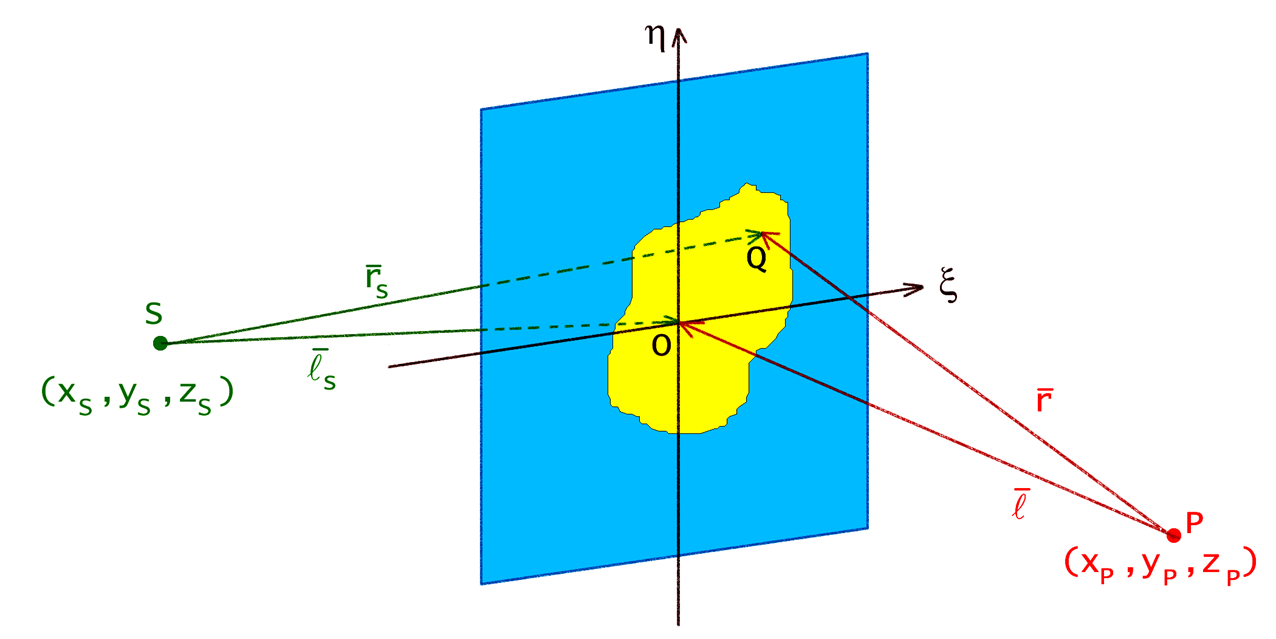

For $l_s,l \gg \text{aperture dimensions} \Longrightarrow$
$$E_{cP}=\dfrac{\imath k A}{4\pi} \int_\sigma \dfrac{e^{-\imath k (r_p+r_s)}}{r_p r_s} \left( \cos(\theta)+\sin(\theta)\right ) d\sigma$$

In [16]:
import math
import numpy as np

def diff(theta, phi, k, rs, rp):
    coss = (np.cos(theta) + np.cos(phi)) / (rs * rp)
    E = coss * np.exp(-1j*k* (rp + rs))
    return E

def diffraction_intensity_rectangle_numerical(xs, ys, xp, yp, S, P, A, a,b,lambda_nm):
    k = 2.0 * math.pi / (lambda_nm*1e-9)
    dx = a/100 # cartesian mesh (X and Y directions)
    Nx = round(2 * a / dx) # Number of points in X-direction
    Ny = round(Nx*b/a)     # Number of points in Y-direction
    E = 0.0+0.0j
    for i in range(Nx):
        xa = a * (Nx - 2 * i) / Nx
        for j in range(Ny):
            ya = b * (Ny - 2 * j) / Ny
            rs = np.sqrt(S**2 + (xa - xs)**2 + (ya - ys)**2)
            rp = np.sqrt(P**2 + (xa - xp)**2 + (ya - yp)**2)
            theta = math.acos(S / rs)
            phi = math.acos(P / rp)
            E+= diff(theta, phi, k, rs, rp)
    E = 1j*E * k * A * dx * dx / (4 * np.pi)
    return np.real(E*np.conjugate(E))

# Fraunhofer diffraction (analytic)

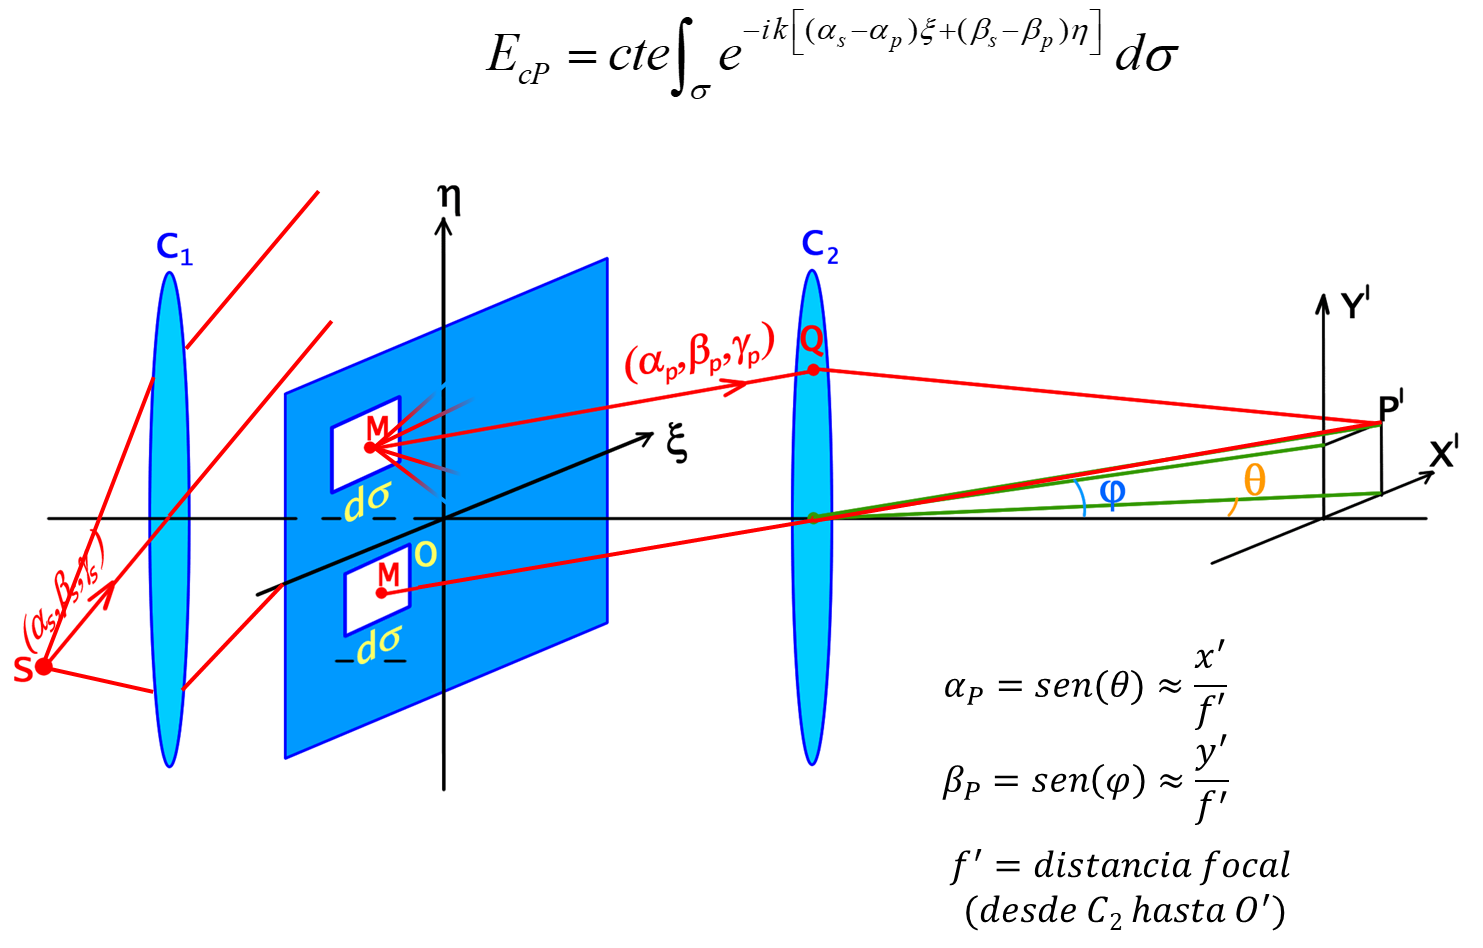

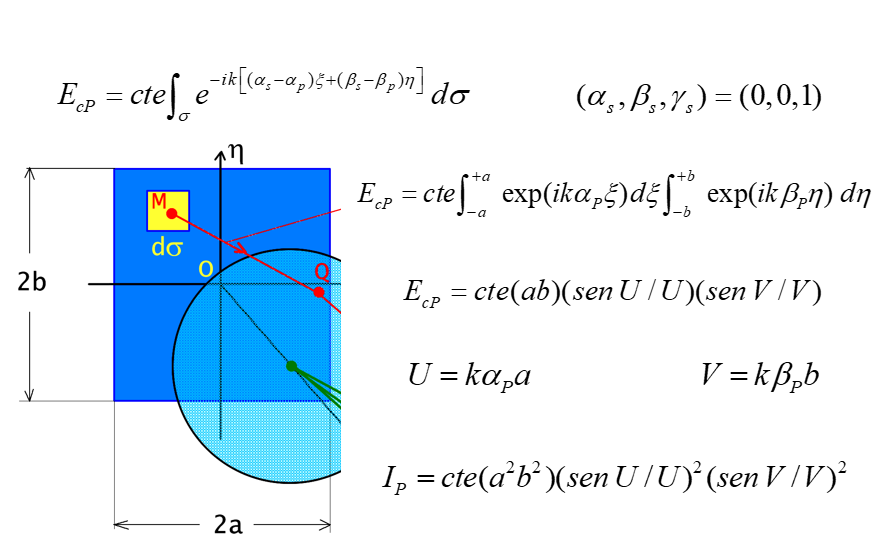

In [17]:
import numpy as np
def diffraction_intensity_rectangle_analytic(xp, yp, P, a,b, lambda_nm):
  '''
  For (xs,ys)=(0,0)
  '''
  k = 2.0 * math.pi / (lambda_nm*1e-9)
  alfa_p=xp/np.sqrt(xp**2+P**2) #sin(theta)
  beta_p=yp/np.sqrt(yp**2+P**2) #sin(phi)
  tolerance=1e-9 # To avoid Zero Division Errors
  U=k*a*alfa_p + tolerance
  V=k*b*beta_p + tolerance
  Ip=(a*b)**2*(np.sin(U)/U)**2*(np.sin(V)/V)**2
  return Ip

# Parameters (geometry)

Infrarrojo lejano con abertura rectangular
+ 𝑆 = 100.0 𝑚 (distancia al emisor)
+ 𝑃 = 10.0 𝑚 (disancia a la pantalla)
+ 𝑎 = 1 𝑚𝑚 (anchura abertura horizontal)
+ 𝑏 = 1 𝑚𝑚 (anchura abertura vertical)
+ λ= 600.0 n𝑚
+ 𝑑𝑥 = 0.01 𝑚𝑚

In [18]:
xs, ys = 0, 0.0
S, P = 100.0, 10.0 # m
A = 1              # Amplitude (arbitrary units)
a=1e-3             # m
b=a                # m
lambda_nm = 600.0 # nm
k = 2.0 * math.pi / (lambda_nm*1e-9)
tolerance=1e-9 # To avoid Zero Division Errors

# Diffraction pattern at $\varphi=0$ (both analytic and numerical)

In [19]:
def calc_diff_pattern_phi0():
    Xp=100
    m=5
    xpm = m*P*(lambda_nm*1e-9)/(2.0*a) # Plot the first m minima (direction a)
    diff_pattern = []
    for i in range(Xp):
      print("iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp + tolerance
      yp=tolerance
      I_numerical= diffraction_intensity_rectangle_numerical(xs, ys, xp, yp, S, P, A,a,b, lambda_nm)
      I_analytic=  diffraction_intensity_rectangle_analytic(xp-xs, yp-ys, P, a,b, lambda_nm)
      diff_pattern.append([xp,I_analytic,I_numerical])
    return np.array(diff_pattern)

In [20]:
diff_pattern=calc_diff_pattern_phi0()

iteration 0  of  100
iteration 1  of  100
iteration 2  of  100
iteration 3  of  100
iteration 4  of  100
iteration 5  of  100
iteration 6  of  100
iteration 7  of  100
iteration 8  of  100
iteration 9  of  100
iteration 10  of  100
iteration 11  of  100
iteration 12  of  100
iteration 13  of  100
iteration 14  of  100
iteration 15  of  100
iteration 16  of  100
iteration 17  of  100
iteration 18  of  100
iteration 19  of  100
iteration 20  of  100
iteration 21  of  100
iteration 22  of  100
iteration 23  of  100
iteration 24  of  100
iteration 25  of  100
iteration 26  of  100
iteration 27  of  100
iteration 28  of  100
iteration 29  of  100
iteration 30  of  100
iteration 31  of  100
iteration 32  of  100
iteration 33  of  100
iteration 34  of  100
iteration 35  of  100
iteration 36  of  100
iteration 37  of  100
iteration 38  of  100
iteration 39  of  100
iteration 40  of  100
iteration 41  of  100
iteration 42  of  100
iteration 43  of  100
iteration 44  of  100
iteration 45  of  10

## Plot static figure (both analytic and numerical)

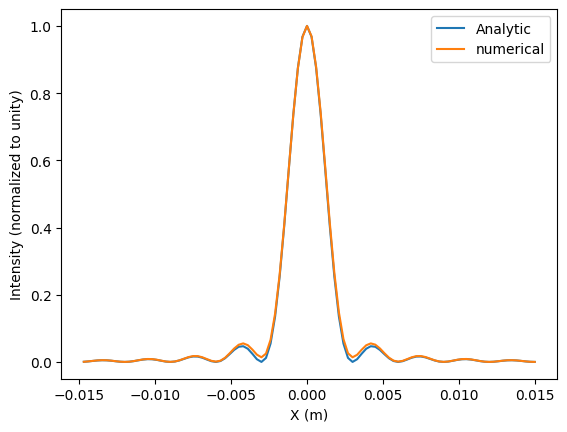

In [21]:
import matplotlib.pyplot as plt

x=diff_pattern[:,0]
y_analytic=diff_pattern[:,1]/np.max(diff_pattern[:,1]) # Normalized to 1
y_numerical=diff_pattern[:,2]/np.max(diff_pattern[:,2])  # Normalized to 1
plt.plot(x,y_analytic,label='Analytic')
plt.plot(x,y_numerical,label='numerical')

plt.xlabel('X (m)')
plt.ylabel('Intensity (normalized to unity)')
plt.legend()
plt.show()

## Location of diffraction maxima

Maxima at $U_M/\pi \iff \tan(U_M)=U_M$

In [35]:
'''
Written by Pedro López García <821948@unizar.es>
'''
import numpy as np

#Este bucle es para ir moviéndome por los sucesivos ceros
print("Número de máximo y coordenada (U/pi):")
print("(primer máximo en U=0)")
for n in range(1,20):
    x = (np.pi)*(2*n + 1)/2 - 0.001 #Este es el valor inicial del metodo de Newton-Raphson
    epsilon = 10e-7 #Pongo una tolerancia arbitraria para no hacer iteraciones innecesarias
    for i in range (1,100): #Aquí comienza el bucle de Newton con la funcion f(x) = tan(x) - x
        v = (np.tan(x) - x)/((np.tan(x))**2)
        if v <= epsilon: break #Como a es la diferencia entre cada iteracion, lo tomo como tolerancia-
        x = x - v #Metodo de Newton propiamente dicho
    x = x/(np.pi)
    print(n+1,x) #Imprime por pantalla numero del cero, valor y numero de iteraciones

Número de máximo y coordenada (U/pi):
(primer máximo en U=0)
2 1.4302966540060227
3 2.4590240385492304
4 3.470889724352472
5 4.477408594992117
6 5.481536650960945
7 6.484387126397482
8 7.486474317380698
9 8.488068707817007
10 9.489326620084436
11 10.490344444637438
12 11.49118495783027
13 12.491891085704925
14 13.492492058452697
15 14.493010131956922
16 15.493461329118855
17 16.493857805382916
18 17.4942089435258
19 18.49452209913874
20 19.494803119026113


## Plot dynamic figure (analytic)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import SelectionSlider

def plot_function_with_sliders(f, labels, x_min, y_min,max_y,value_scale):
    # Extract the parameter names from the function signature, excluding 'x'
    parameters = list(f.__code__.co_varnames)[1:f.__code__.co_argcount]

    # Create sliders for each parameter
    # Define the base, min exponent, and max exponent for the slider
    sliders = {}
    i=0
    for param in parameters:
        #print("parameter=",param)
        #print("[initial value, min, max, step]=",value_scale[i])
        sliders[param] = widgets.FloatSlider(value=value_scale[i][0],
                                             min=value_scale[i][1],
                                             max=value_scale[i][2],
                                             step=value_scale[i][3],
                                             description=param,
                                             readout_format='.3f')
        i+=1

    # Create sliders for x_max and y_max
    #print("xmax")
    #print("[initial value, min, max, step]=",value_scale[i])
    x_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='x scale',
                                       readout_format='.3f')
    #print("ymax")
    #print("[initial value, min, max, step]=",value_scale[i+1])
    y_max_slider = widgets.FloatSlider(value=value_scale[i+1][0],
                                       min=value_scale[i+1][1],
                                       max=value_scale[i+1][2],
                                       step=value_scale[i+1][3],
                                       description='I scale',
                                       readout_format='.3f')

    # Define a function to update the plot
    def update_plot(**kwargs):
        plt.figure(figsize=(8, 6))
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

        x = np.linspace(x_min-x_max_slider.value, abs(x_min)+x_max_slider.value, 200)

        # Pass slider values as keyword arguments to the input function
        params = {param: slider.value for param, slider in sliders.items()}
        y = f(x, **params)

        plt.plot(x, y/max_y)
        plt.scatter(x, y/max_y,color='red')
        plt.title("Intensity normalized at $(x_p,y_p)=(0,0)$ ("+str(max_y)+'$m^2$)')
        plt.grid(True)
        plt.xlim(x_min-x_max_slider.value, abs(x_min)+x_max_slider.value)
        plt.ylim(y_min, y_max_slider.value)
        plt.show()

    # Create an interactive plot with the sliders
    interactive_plot = interactive(update_plot, **sliders, x_max=x_max_slider, y_max=y_max_slider)
    return interactive_plot

In [28]:
# Example of an input function
function=diffraction_intensity_rectangle_analytic #diffraction_intensity_rectangle_analytic(xp, yp, P, a,b, k)


# Define labels, axis limits, and initial parameter values
labels = ["x(m)", "Intensity (norm.)"]
m=5
x_min = -m*P*(lambda_nm*1e-9)/(2.0*a)
y_min = 0.0
max_y = (a*b)**2
# value_scale (each): [initial value, min,max,step]
value_scale=[[1e-9,-1e-2,1e-2,1e-3], # yp
             [P,0.1*P,10*P,0.1*P],   # P
             [a,0.1*a,10*a,0.1*a],   # a
             [b,0.1*a,10*a,0.1*a],   # b
             [lambda_nm,0.5*lambda_nm,3.0*lambda_nm,0.1*lambda_nm],      # lambda (wavelength) in nm
             [-1e-2,0,1e-1,1e-3],    # x scale
             [1.0,0.01,50.0,0.05]]    # y scale

# Create the interactive plot
interactive_plot = plot_function_with_sliders(function,
                                              labels,
                                              x_min, y_min,
                                              max_y,
                                              value_scale)

# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=1e-09, description='yp', max=0.01, min=-0.01, readout_format='.3f', st…

# 2D diffraction pattern (analytic)

In [25]:
def diff_pattern_2D():
    Xp=200
    Yp=200
    m=5
    xpm = m*P*(lambda_nm*1e-9)/(2.0*a)
    ypm = xpm

    diff_pattern = []
    for i in range(Xp):
      xp=xpm * (Xp - 2 * i) / Xp + tolerance
      for j in range(Yp):
        yp=ypm * (Yp - 2 * j) / Yp + tolerance
        I_analytic=diffraction_intensity_rectangle_analytic(xp-xs, yp-ys, P, a,b, lambda_nm)
        diff_pattern.append([xp,yp,I_analytic])
    return np.array(diff_pattern)

In [26]:
diff_pattern_2D=diff_pattern_2D()
print(diff_pattern_2D.shape)

(40000, 3)


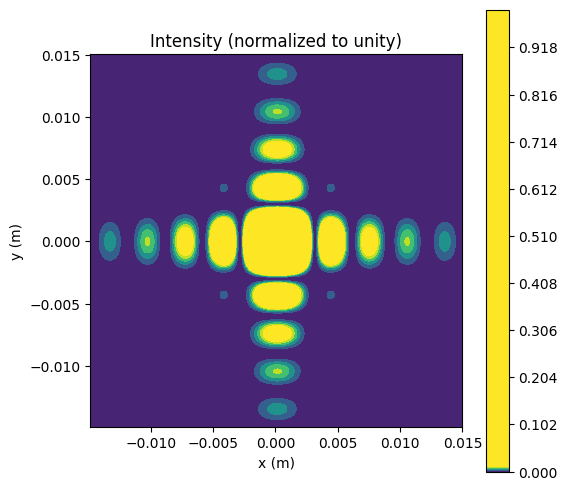

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your numpy array)
data =diff_pattern_2D

# Extract x, y, and the value from the data
x = data[:, 0]
y = data[:, 1]
value = data[:, 2]/np.max(data[:, 2])

# Reshape the value to a 2D grid for contour plotting
x_unique = np.unique(x)
y_unique = np.unique(y)
X, Y = np.meshgrid(x_unique, y_unique)
Z = value.reshape(len(y_unique), len(x_unique))

# Create a contour plot
plt.figure(figsize=(6, 6))
max_value=np.max(Z)/100
contour = plt.contourf(X, Y, np.rot90(Z), levels=500, cmap='viridis',
                       vmax=max_value)
plt.colorbar(contour)  # Use scientific notation for colorbar


plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Intensity (normalized to unity)')
plt.gca().set_aspect('equal')  # Set equal aspect ratio
plt.show()
